<a href="https://colab.research.google.com/github/stackcato/data-analytics-proyecto02/blob/main/D%26A_Proyecto02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import statistics as stats
import math as math
import seaborn as sns
import scipy
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive/')
#!pip install statistics

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


<h2>Ejercicio 1:</h2>
Fichero autos.csv

Generar una función y utilizar esta para recodificar la variable “país
de origen” (1, 2, 3) en el dataframe a través de la función apply.

Desarrollo 1:

In [ ]:
path = '/content/drive/MyDrive/Data Science/Colab Notebooks/BBDD/autos.csv'
df = pd.read_csv(path, sep=';')
df.head()

,Millas_Por_Galon,Cilindros,Pais_Origen,Peso_En_Libras,Desplazamiento,Aceleracion,Nombre,Anyo,Caballo_De_Fuerza
0,18.0,8,USA,3504,307.0,12.0,chevrolet chevelle malibu,1/01/1970,130.0
1,15.0,8,USA,3693,350.0,11.5,buick skylark 320,1/01/1970,165.0
2,18.0,8,USA,3436,318.0,11.0,plymouth satellite,1/01/1970,150.0
3,16.0,8,USA,3433,304.0,12.0,amc rebel sst,1/01/1970,150.0
4,17.0,8,USA,3449,302.0,10.5,ford torino,1/01/1970,140.0


In [ ]:
df.Pais_Origen.value_counts()

USA       254
Japan      79
Europe     73
Name: Pais_Origen, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Millas_Por_Galon   398 non-null    float64
 1   Cilindros          406 non-null    int64  
 2   Pais_Origen        406 non-null    object 
 3   Peso_En_Libras     406 non-null    int64  
 4   Desplazamiento     406 non-null    float64
 5   Aceleracion        406 non-null    float64
 6   Nombre             406 non-null    object 
 7   Anyo               406 non-null    object 
 8   Caballo_De_Fuerza  400 non-null    float64
dtypes: float64(4), int64(2), object(3)
memory usage: 28.7+ KB


In [ ]:
df['Pais_Origen'] = df['Pais_Origen'].astype('string')
df.info()
print(df['Pais_Origen'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Millas_Por_Galon   398 non-null    float64
 1   Cilindros          406 non-null    int64  
 2   Pais_Origen        406 non-null    string 
 3   Peso_En_Libras     406 non-null    int64  
 4   Desplazamiento     406 non-null    float64
 5   Aceleracion        406 non-null    float64
 6   Nombre             406 non-null    object 
 7   Anyo               406 non-null    object 
 8   Caballo_De_Fuerza  400 non-null    float64
dtypes: float64(4), int64(2), object(2), string(1)
memory usage: 28.7+ KB
0         USA
1         USA
2         USA
3         USA
4         USA
        ...  
401       USA
402    Europe
403       USA
404       USA
405       USA
Name: Pais_Origen, Length: 406, dtype: string


In [ ]:
df1 = df.copy()

pais = df1['Pais_Origen']

def pais_origen_cod(pais):
  # for i in pais]: #Averiguar porque en este caso no funciona FOR, solo devuelve el primer número 1111111...
    if pais == 'USA':
      return 1
    elif pais == 'Europe':
      return 2
    elif pais == 'Japan':
      return 3  
    else:
      return 'no data de pais'
  # pais_cod = df1['Pais_Origen'].replace(['USA', 'Europe', 'Japan'],[1,2,3]) #Manera facil sin función

df1['Pais_Origen_Codificado'] = df1['Pais_Origen'].apply(pais_origen_cod)
df1.head(20) 

,Millas_Por_Galon,Cilindros,Pais_Origen,Peso_En_Libras,Desplazamiento,Aceleracion,Nombre,Anyo,Caballo_De_Fuerza,Pais_Origen_Codificado
0,18.0,8,USA,3504,307.0,12.0,chevrolet chevelle malibu,1/01/1970,130.0,1
1,15.0,8,USA,3693,350.0,11.5,buick skylark 320,1/01/1970,165.0,1
2,18.0,8,USA,3436,318.0,11.0,plymouth satellite,1/01/1970,150.0,1
3,16.0,8,USA,3433,304.0,12.0,amc rebel sst,1/01/1970,150.0,1
4,17.0,8,USA,3449,302.0,10.5,ford torino,1/01/1970,140.0,1
5,15.0,8,USA,4341,429.0,10.0,ford galaxie 500,1/01/1970,198.0,1
6,14.0,8,USA,4354,454.0,9.0,chevrolet impala,1/01/1970,220.0,1
7,14.0,8,USA,4312,440.0,8.5,plymouth fury iii,1/01/1970,215.0,1
8,14.0,8,USA,4425,455.0,10.0,pontiac catalina,1/01/1970,225.0,1
9,15.0,8,USA,3850,390.0,8.5,amc ambassador dpl,1/01/1970,190.0,1


<h2>Ejercicio 2</h2>
Generar un Notebook Colab con código y resultados, con el
siguiente fichero autos.csv que contiene información de autos de
un periodo de tiempo. Resolver los siguientes:

1. Limpieza y tratamiento de las variables (Según corresponda)

In [ ]:
data = df.copy()
# data[data['Nombre'].duplicated()].head(50)
# data['Nombre'].value_counts().head(50)

In [ ]:
data.info()
data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Millas_Por_Galon   398 non-null    float64
 1   Cilindros          406 non-null    int64  
 2   Pais_Origen        406 non-null    object 
 3   Peso_En_Libras     406 non-null    int64  
 4   Desplazamiento     406 non-null    float64
 5   Aceleracion        406 non-null    float64
 6   Nombre             406 non-null    object 
 7   Anyo               406 non-null    object 
 8   Caballo_De_Fuerza  400 non-null    float64
dtypes: float64(4), int64(2), object(3)
memory usage: 28.7+ KB


(406, 9)

In [ ]:
data.isna().sum()

Millas_Por_Galon     8
Cilindros            0
Pais_Origen          0
Peso_En_Libras       0
Desplazamiento       0
Aceleracion          0
Nombre               0
Anyo                 0
Caballo_De_Fuerza    6
dtype: int64

In [ ]:
data['Pais_Origen'] = data['Pais_Origen'].apply(lambda x: 1 if x=='USA' else (2 if x=='Europe' else 3))
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Millas_Por_Galon   398 non-null    float64
 1   Cilindros          406 non-null    int64  
 2   Pais_Origen        406 non-null    int64  
 3   Peso_En_Libras     406 non-null    int64  
 4   Desplazamiento     406 non-null    float64
 5   Aceleracion        406 non-null    float64
 6   Nombre             406 non-null    object 
 7   Anyo               406 non-null    object 
 8   Caballo_De_Fuerza  400 non-null    float64
dtypes: float64(4), int64(3), object(2)
memory usage: 28.7+ KB


In [ ]:
data_num = data.loc[:, ['Millas_Por_Galon', 'Cilindros', 'Pais_Origen', 'Peso_En_Libras', 'Desplazamiento', 'Aceleracion', 'Caballo_De_Fuerza']] 
data_num

,Millas_Por_Galon,Cilindros,Pais_Origen,Peso_En_Libras,Desplazamiento,Aceleracion,Caballo_De_Fuerza
0,18.0,8,1,3504,307.0,12.0,130.0
1,15.0,8,1,3693,350.0,11.5,165.0
2,18.0,8,1,3436,318.0,11.0,150.0
3,16.0,8,1,3433,304.0,12.0,150.0
4,17.0,8,1,3449,302.0,10.5,140.0
...,...,...,...,...,...,...,...
401,27.0,4,1,2790,140.0,15.6,86.0
402,44.0,4,2,2130,97.0,24.6,52.0
403,32.0,4,1,2295,135.0,11.6,84.0
404,28.0,4,1,2625,120.0,18.6,79.0


In [ ]:
data_num = data_num.apply(lambda x: x.fillna(x.median()), axis = 0)
data_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Millas_Por_Galon   406 non-null    float64
 1   Cilindros          406 non-null    int64  
 2   Pais_Origen        406 non-null    int64  
 3   Peso_En_Libras     406 non-null    int64  
 4   Desplazamiento     406 non-null    float64
 5   Aceleracion        406 non-null    float64
 6   Caballo_De_Fuerza  406 non-null    float64
dtypes: float64(4), int64(3)
memory usage: 22.3 KB


2. Generar 5 nuevas variables aplicando los siguientes criterios
con las variables numéricas:

★ Log10(var1/var2)

★ Sqrt(var1)exp(var2)/200

★ Si var 1 &gt; var 2 → 5, caso contrario 3

★ 1/logn(var1/var2)*100

★ var2**2/var1

In [ ]:
#1ra variable
var1 = round(np.var(df["Millas_Por_Galon"]), 2)
var2 = round(np.var(df["Cilindros"]), 2)
variable_1 = math.log10(var1 / var2)
print('Variable 1 es', round(variable_1, 2))
data['Logaritmo 10'] = variable_1

#2da variable
r2_var1 = math.sqrt(var1)
exp_var2 = math.exp(var2)
variable_2 = (r2_var1 * exp_var2)/200
print('Variable 2 es', round(variable_2, 2))
data['Raiz y Exp'] = variable_2

#3ra variable
if var1 > var2:
  print('Variable 3 es', 5)
else:
  print('Variable 3 es', 3)

# 4ta variable
variable_4 = 1/math.log10(var1/var2)*100
print('Variable 4 es', round(variable_4, 2))

#5ta variable
variable_5 = (var2**2)/var1
print('Variable 5 es', round(variable_5, 2))
data['cinco'] = variable_5

Variable 1 es 1.32
Variable 2 es 0.72
Variable 3 es 5
Variable 4 es 75.79
Variable 5 es 0.14


3. Generar 3 variables cualitativas ordinales con los siguientes
criterios:

★ Si es mayor a la “media + 1*desviación estándar” →
Alto

★ Si está entre “media - 1*desviación estándar” y
“media + 1*desviación estándar” → Medio

★ Si es menor a la “media - 1*desviación estándar” →
Bajo

Nota: Mostrar con las nuevas variables generadas.
Elegir con libertad las variables a trabajar.

In [ ]:
media = stats.mean(data['Pais_Origen'])
desv_estandar = stats.stdev(data['Pais_Origen'])
mediana = stats.median(data['Pais_Origen'])

criterio_alto = media + 1*desv_estandar
criterio_medio1 = media - 1*desv_estandar
criterio_medio2 = media + 1*desv_estandar
criterio_bajo = media - 1*desv_estandar
print(mediana)
print(criterio_alto)
print(criterio_bajo)

pais = data['Pais_Origen']

# metodo 1:
if mediana > (media +  1*desv_estandar):
  # variable alto
    alto = 'alto'
    print('El valor es', alto)
elif mediana > (media - 1*desv_estandar) and mediana < (media + 1*desv_estandar):
  # variable medio
    medio = 'medio'
    print('El valor es', medio)
elif mediana < (media - 1*desv_estandar):
  # variable bajo
    bajo = 'bajo'
    print('El valor es', bajo)
else:
    print('no coincide data')

# metodo 2:
def calculo_pais(pais):
  if pais > (media +  1*desv_estandar):
  # variable alto
    alto = 'alto'
    return alto
  elif pais > (media - 1*desv_estandar) and pais < (media + 1*desv_estandar):
  # variable medio
    medio = 'medio'
    return medio
  elif pais < (media - 1*desv_estandar):
  # variable bajo
    bajo = 'bajo'
    return bajo
  else:
    return 'no coincide data'

data['calculo_pais'] = data['Pais_Origen'].apply(calculo_pais)
data.head()

1.0
2.3664445165658496
0.7714865179169087
El valor es medio


,Millas_Por_Galon,Cilindros,Pais_Origen,Peso_En_Libras,Desplazamiento,Aceleracion,Nombre,Anyo,Caballo_De_Fuerza,Logaritmo 10,Raiz y Exp,cinco,calculo_pais
0,18.0,8,1,3504,307.0,12.0,chevrolet chevelle malibu,1/01/1970,130.0,1.31952,0.723704,0.139915,medio
1,15.0,8,1,3693,350.0,11.5,buick skylark 320,1/01/1970,165.0,1.31952,0.723704,0.139915,medio
2,18.0,8,1,3436,318.0,11.0,plymouth satellite,1/01/1970,150.0,1.31952,0.723704,0.139915,medio
3,16.0,8,1,3433,304.0,12.0,amc rebel sst,1/01/1970,150.0,1.31952,0.723704,0.139915,medio
4,17.0,8,1,3449,302.0,10.5,ford torino,1/01/1970,140.0,1.31952,0.723704,0.139915,medio


In [ ]:
data = data.drop(['Logaritmo 10', 'Raiz y Exp', 'cinco', 'calculo_pais'], axis='columns')
data

,Millas_Por_Galon,Cilindros,Pais_Origen,Peso_En_Libras,Desplazamiento,Aceleracion,Nombre,Anyo,Caballo_De_Fuerza
0,18.0,8,1,3504,307.0,12.0,chevrolet chevelle malibu,1/01/1970,130.0
1,15.0,8,1,3693,350.0,11.5,buick skylark 320,1/01/1970,165.0
2,18.0,8,1,3436,318.0,11.0,plymouth satellite,1/01/1970,150.0
3,16.0,8,1,3433,304.0,12.0,amc rebel sst,1/01/1970,150.0
4,17.0,8,1,3449,302.0,10.5,ford torino,1/01/1970,140.0
...,...,...,...,...,...,...,...,...,...
401,27.0,4,1,2790,140.0,15.6,ford mustang gl,1/01/1982,86.0
402,44.0,4,2,2130,97.0,24.6,vw pickup,1/01/1982,52.0
403,32.0,4,1,2295,135.0,11.6,dodge rampage,1/01/1982,84.0
404,28.0,4,1,2625,120.0,18.6,ford ranger,1/01/1982,79.0


In [ ]:
# var_num = data.select_dtypes(include=['float64', 'int']).columns
# data[var_num].head()

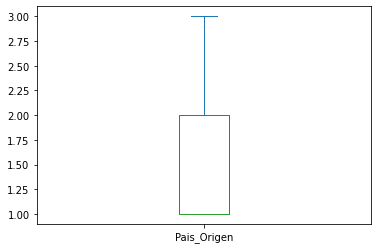

In [ ]:
data_graf = data.loc[:, ['Peso_En_Libras', 'Pais_Origen']] 
data_graf.Pais_Origen.plot.box()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


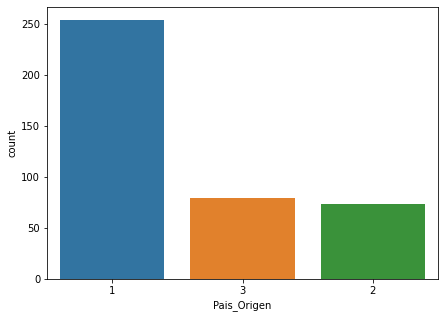

In [ ]:
plt.figure(figsize=(7,5))
sns.countplot(data['Pais_Origen'], order=data['Pais_Origen'].value_counts().index)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


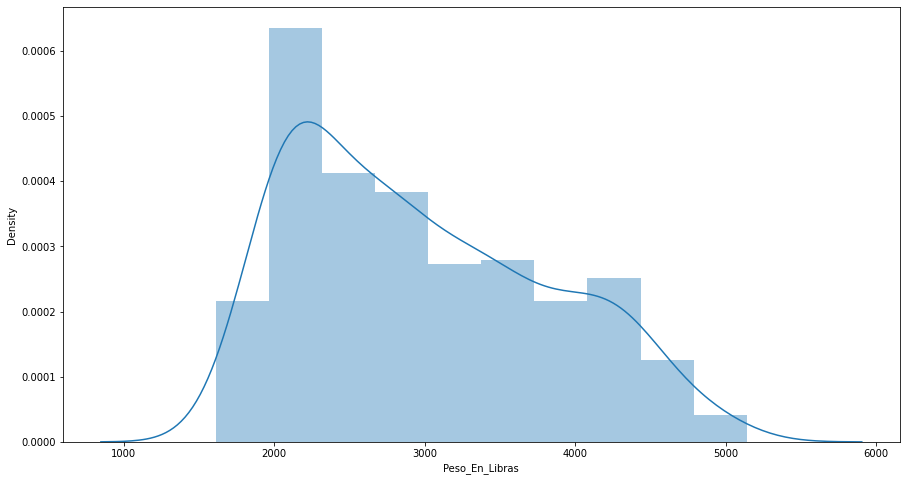

In [ ]:
plt.figure(figsize=(15,8))
sns.distplot(data['Peso_En_Libras'])
plt.show()

Crear una función que devuelva un mapa de calor con la
correlación de todas las variables numéricas (incluye las
generadas), para cada país.

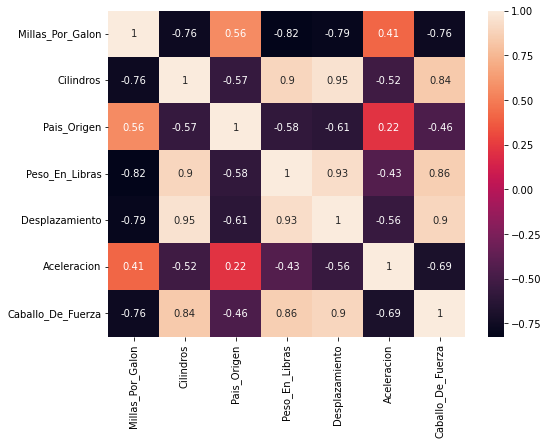

In [ ]:
plt.figure(figsize=(8,6))
correlacion = data_num.corr() # pearson
sns.heatmap(correlacion,
            xticklabels = correlacion.columns.values,
            yticklabels = correlacion.columns.values,
            annot = True
            );